In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-phishing-dataset/email_phishing_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/email-phishing-dataset/email_phishing_data.csv")
df.sample(5)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
246985,140,93,52,0,0,0,4,0,0
270395,31,21,5,0,0,3,12,0,0
430783,191,117,74,0,0,0,3,0,0
17002,60,41,13,0,0,3,12,0,0
493387,111,78,38,0,0,4,24,0,0


In [3]:
df.dtypes

num_words              int64
num_unique_words       int64
num_stopwords          int64
num_links              int64
num_unique_domains     int64
num_email_addresses    int64
num_spelling_errors    int64
num_urgent_keywords    int64
label                  int64
dtype: object

In [4]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


Insights you can derive from the above stats summary:


**1. num_words:**

* Mean: 276.23 (2.762280e+02) words per email.
* Std Dev: 3335.46, which is very high relative to the mean. This suggests a wide spread in the number of words, with some emails being extremely long.
* Max: 2,339,682 words in one email which indicates that there is potential outliers or very large attachments.
* Quartiles: 75% of emails have 269 words or less which means that the mean is skewed by a very long emails.

**and more like that...**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [6]:
df.shape

(524846, 9)

In [7]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


**Note:**
Class Imbalance:

The label() col shows a significant class imbalance, i.e; maximum emails are labeled as 'safe' whereas very less as labeled as 'phishing'. There may be chances, that if is not handled then the model would perform very poor at identifying the crucial 'phishing' emails (minority class), which can lead to a number of False Negatives.

## Using Logistic Regression

In [8]:
# solving class imbalance using class_weight parameter, which is preferred for minimal preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression      # LogisticRegression for baseline, good choice for this type of numerical, tabular data
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# train-test split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Logistic Regression
lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)       # class_weight is balanced, it will automatically calculates weights inversely proportional to class frequencies, giving more importance to the minority class
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [9]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # probability for the positive class (1)

print("------------- Model Performance -------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
print(f"Precision (Phishing): {precision_score(y_test, y_pred, pos_label=1): .4f}")
print(f"Recall (Phishing): {recall_score(y_test, y_pred, pos_label=1): .4f}")
print(f"F1-Score (Phishing): {f1_score(y_test, y_pred, pos_label=1): .4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

------------- Model Performance -------------
Accuracy:  0.5466
Precision (Phishing):  0.0217
Recall (Phishing):  0.7547
F1-Score (Phishing):  0.0422
ROC AUC Score: 0.649229421251568


 ----------- Confusion Matrix ------------
[[56325 47255]
 [  341  1049]]


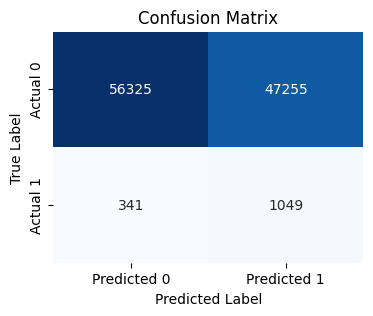

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print(" ----------- Confusion Matrix ------------")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# visualizing the cm
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier    # for robust approach

# train-test split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Logistic Regression
rf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced',n_jobs=-1)       # n_jobs=-1, means it will us all available CPU cores for faster training
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

------------- Model Performance -------------
Accuracy:  0.9828
Precision (Phishing):  0.3272
Recall (Phishing):  0.2806
F1-Score (Phishing):  0.3021
ROC AUC Score: 0.6364163660382757
 ----------- Confusion Matrix ------------
[[102778    802]
 [  1000    390]]


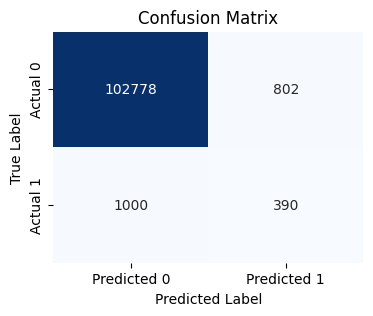

In [12]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # probability for the positive class (1)

print("------------- Model Performance -------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
print(f"Precision (Phishing): {precision_score(y_test, y_pred, pos_label=1): .4f}")
print(f"Recall (Phishing): {recall_score(y_test, y_pred, pos_label=1): .4f}")
print(f"F1-Score (Phishing): {f1_score(y_test, y_pred, pos_label=1): .4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

import matplotlib.pyplot as plt
import seaborn as sns

print(" ----------- Confusion Matrix ------------")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# visualizing the cm
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Using Gradient Boosting

In [13]:
import lightgbm as lgb     # for Gradient Boosting, for its speed and performance

# train-test split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Logistic Regression
lgbm = lgb.LGBMClassifier(random_state=42, is_unbalance=True, n_estimators=200)       # is_unbalance=True helps with imbalance
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 5559, number of negative: 414317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 419876, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.013240 -> initscore=-4.311213
[LightGBM] [Info] Start training from score -4.311213


------------- Model Performance -------------
Accuracy:  0.8191
Precision (Phishing):  0.0525
Recall (Phishing):  0.7432
F1-Score (Phishing):  0.0981
ROC AUC Score: 0.7816522453016541
 ----------- Confusion Matrix ------------
[[84950 18630]
 [  357  1033]]


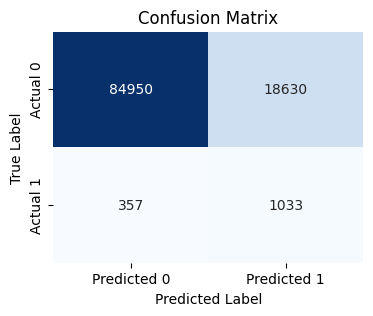

In [14]:
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]  # probability for the positive class (1)

print("------------- Model Performance -------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
print(f"Precision (Phishing): {precision_score(y_test, y_pred, pos_label=1): .4f}")
print(f"Recall (Phishing): {recall_score(y_test, y_pred, pos_label=1): .4f}")
print(f"F1-Score (Phishing): {f1_score(y_test, y_pred, pos_label=1): .4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")

import matplotlib.pyplot as plt
import seaborn as sns

print(" ----------- Confusion Matrix ------------")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# visualizing the cm
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()